<p align="center" style="font-size:400%;"> <b>Q-Voter model with independence on multiplex network</b>
</p>
<br>
<p align="center">Kamil P. Orzechowski  </p>
<br>
<p align="justify">The model contains two layers - ER graphs on which the q-voter model's dynamics is simulated. The reseach is about gaining average magnetization in function of "social temperature" and observing phase transition (first and second order).</p>
<br>

Literature source: [<i>Pair approximation for the q-voter model with independence on multiplex networks</i>](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.102.022314) [PHYSICAL REVIEW E 102, 022314 (2020)]

I'd like to thank the first author of above paper -> T.Gradowski for the opportunity to discuss my results.

###Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from google.colab import files
from collections import Counter
from tqdm.notebook import tqdm
import copy
!pip install networkit
import networkit as nk

import sympy as sp
sp.init_printing()   

###Model & functions

In [ ]:
def me_and_lobby(layer, l, node, q):
  neighbors = rd.sample(list(layer.iterNeighbors(node)),q)
  neighbours_status = [l[i] for i in neighbors]
  if neighbours_status.count(neighbours_status[0]) == len(neighbours_status) and l[node] != neighbours_status[0]: return 1 
  else: return 0 

In [ ]:
def lay(layer, p_temp, l, node, q):
  status = 0
  if rd.uniform(0,1) <= p_temp:
    if rd.uniform(0,1) <= 0.5: status = 1 
    else: pass
  else: 
    status = me_and_lobby(layer, l, node, q)
  return status

Algorithm in source paper: section II. A. (LOCAL&AND spin update rule).

In [ ]:
def Q_Voter_ER(steps,N,frac,p,p_temp,q):
  global general_m
  magn = []
  gen1 = nk.generators.ErdosRenyiGenerator(N,p)
  layer1 = gen1.generate()
  l1 = layer1.attachNodeAttribute("Spin", float)

  gen2 = nk.generators.ErdosRenyiGenerator(N,p)
  layer2 = gen2.generate()
  l2 = layer2.attachNodeAttribute("Spin", float)

  spins = np.random.permutation([-1.0]*(int(N*(1 - frac))) + [1.0]*(int(N*frac))).astype(float)
  for i,node in enumerate(layer1.iterNodes()): 
    l1[node] = spins[i]
    l2[node] = spins[i]

  for step in range(steps):
    for node in np.random.permutation(list(layer1.iterNodes())):
      if lay(layer1,p_temp,l1,node,q) == 1 and lay(layer2,p_temp,l2,node,q) == 1:
        l1[node] *= -1
        l2[node] *= -1
      else: pass
    if step >= 0.90*steps:
      magn.append(np.abs(np.mean([l1[i] for i in layer1.iterNodes()])))
  general_m.append(np.mean(magn))

In [ ]:
t = 1000
N = 10000 
p = 40 / N #<k> = 40
times = 5
q = 4
lst = np.arange(0.3,0.5,0.005)
general_m = []
for i in range(times):
  for temp in tqdm(lst):
    Q_Voter_ER(t,N,0.5,p,temp,q)

In [ ]:
all = []
for i,j,k,l,m in zip(general_m[:40],general_m[40:80],general_m[80:120],general_m[120:160],general_m[160:]):
  all.append(np.mean([i,j,k,l,m]))

df = pd.DataFrame({"p": lst, "m": all})
df.to_csv("res44.csv")
files.download('res44.csv')

###Results

Loading previously saved/generated files.

In [ ]:
res44 = pd.read_csv("res44.csv")
res44b = pd.read_csv("res44b.csv")
res55 = pd.read_csv("res55.csv")
res55b = pd.read_csv("res55b.csv")
res6a = pd.read_csv("res6a.csv")
res6bb = pd.read_csv("res6bb.csv")

In [ ]:
def plot_m(df,q,xlim,df2):
  plt.rcParams.update({'font.size': 22})
  plt.figure(figsize = (15,10))
  lst = list(df["p"])
  all = list(df["m"])
  if type(df2) != type(None):
    lst2 = list(df2["p"])
    all2 = list(df2["m"])
    plt.scatter(lst2,all2, s=190, facecolors='none', edgecolors='darkred', label = r"$\downarrow 50:50 \uparrow$")
  plt.scatter(lst,all, marker = "o",  color = "black", label = r"$\uparrow 100\% \uparrow$")
  plt.plot([],[],color = "white",label = f"q = {q}")
  plt.ylim(0,1)
  plt.xlim(xlim[0],xlim[1])
  plt.xlabel("p")
  plt.ylabel("m(p)")
  plt.legend()

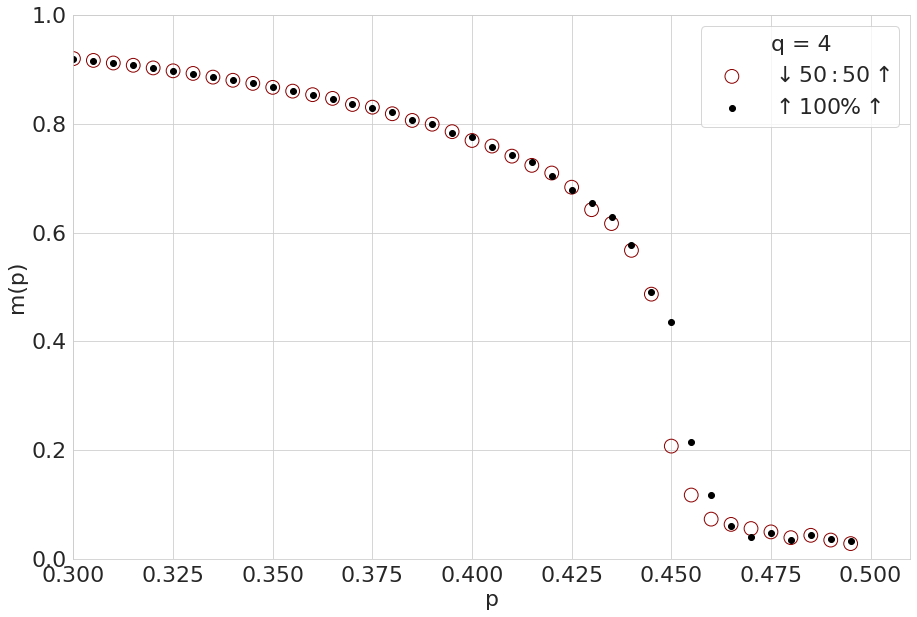

In [ ]:
plot_m(res44,4,[0.3,0.51],res44b)

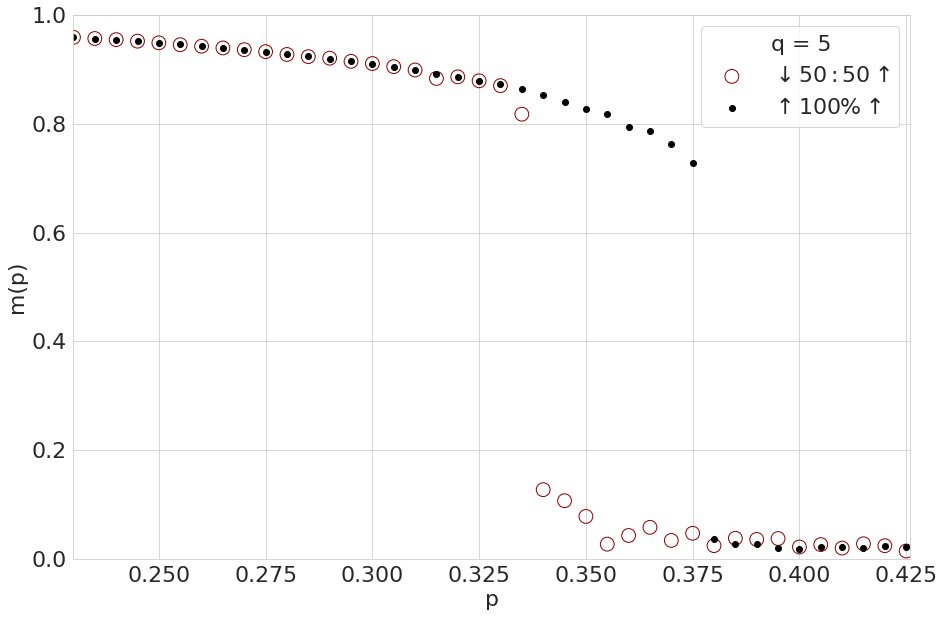

In [ ]:
plot_m(res55,5,[0.23,0.426],res55b)

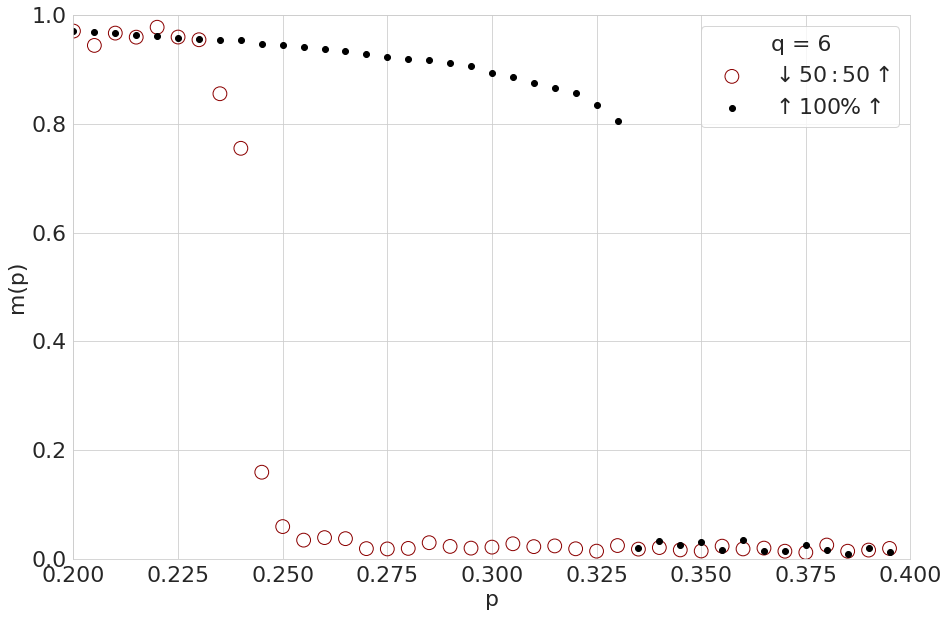

In [ ]:
plot_m(res6a.iloc[::2, :],6,[0.2,0.4],res6bb)

###General results & comparison

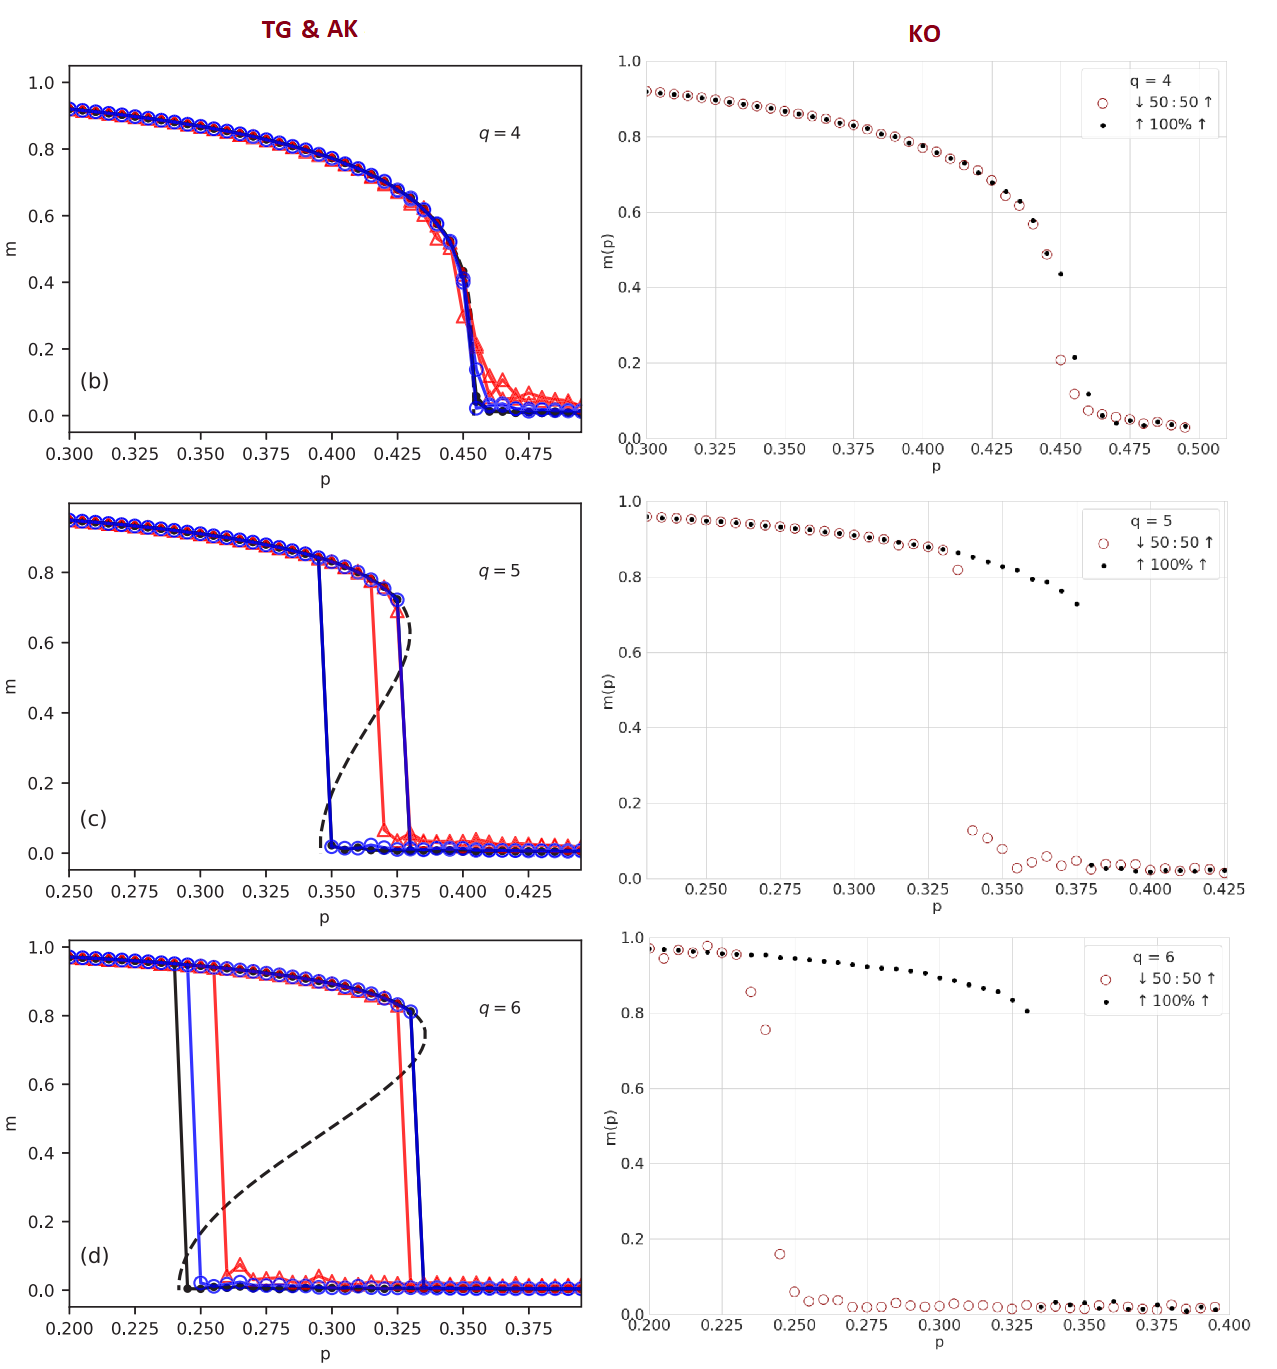